# Markowitz Portfolio Theory

## Introduction

Modern Portfolio Theory (MPT), developed by Harry Markowitz in 1952, is a mathematical framework for assembling a portfolio of assets that maximizes expected return for a given level of risk. The key insight of MPT is that an asset's risk and return should not be assessed in isolation, but by how it contributes to a portfolio's overall risk and return.

## Key Formulas

### Expected Return of a Portfolio

The expected return of a portfolio is the weighted sum of the expected returns of the individual assets:

$$E(R_p) = \sum_{i=1}^{n} w_i \cdot E(R_i)$$

Where:
- $E(R_p)$ is the expected return of the portfolio
- $w_i$ is the weight of asset $i$ in the portfolio
- $E(R_i)$ is the expected return of asset $i$
- $n$ is the number of assets in the portfolio

### Portfolio Variance (Risk)

The variance of a portfolio is:

$$\sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_i \sigma_j \rho_{ij}$$

Where:
- $\sigma_p^2$ is the variance of the portfolio
- $w_i$ and $w_j$ are the weights of assets $i$ and $j$
- $\sigma_i$ and $\sigma_j$ are the standard deviations of assets $i$ and $j$
- $\rho_{ij}$ is the correlation coefficient between assets $i$ and $j$

### Portfolio Standard Deviation (Volatility)

The standard deviation of a portfolio is the square root of its variance:

$$\sigma_p = \sqrt{\sigma_p^2}$$

### For a Two-Asset Portfolio

For a portfolio with just two assets, the formulas simplify to:

**Expected Return:**
$$E(R_p) = w_1 \cdot E(R_1) + w_2 \cdot E(R_2)$$

**Variance:**
$$\sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_1 \sigma_2 \rho_{12}$$

Where $w_1 + w_2 = 1$ (i.e., the weights sum to 100%).

## The Efficient Frontier

The efficient frontier represents portfolios that offer the highest expected return for a defined level of risk. Mathematically, these portfolios are the solution to optimization problems such as:

1. Maximize expected return for a given level of risk
2. Minimize risk for a given expected return

The Capital Allocation Line (CAL) extends the efficient frontier by including a risk-free asset, and the tangency point represents the Market Portfolio.

### The Sharpe Ratio

The **Sharpe Ratio** measures the risk-adjusted return of a portfolio:

$$
S = \frac{E(R_p) - R_f}{\sigma_p}
$$

Where:
- $E(R_p)$ is the expected portfolio return  
- $R_f$ is the risk-free rate  
- $\sigma_p$ is the portfolio’s standard deviation  

In portfolio optimisation, the Sharpe Ratio helps identify the most **efficient portfolio** — the one offering the highest **excess return per unit of risk**. Among portfolios on the efficient frontier, the **tangency portfolio** maximises the Sharpe Ratio and lies on the **Capital Market Line (CML)**. This portfolio, when combined with the risk-free asset, achieves the best possible trade-off between risk and return.

A higher Sharpe Ratio indicates a more attractive risk-return profile.

# Two-Asset Portfolio Analysis

Below we implement the simplest case of Markowitz Portfolio Theory - a portfolio consisting of just two assets. We'll visualize how the risk-return profile changes as we vary the weights between the two assets, and explore how different correlation values affect the shape of the efficient frontier.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# The code below is the function that calculates the portfolio return and volatility for a 2-asset portfolio.
def two_asset_portfolio(r1, r2, sigma1, sigma2, rho, weights=None):
    """
    Calculate portfolio return and volatility for two assets.
    
    Parameters:
    - r1, r2: Expected returns of assets 1 and 2
    - sigma1, sigma2: Volatilities (standard deviations) of assets 1 and 2
    - rho: Correlation coefficient between assets 1 and 2
    - weights: Array of weights for asset 1 (asset 2 weight is calculated as 1-w1)
               If None, 100 evenly spaced weights from 0 to 1 are used
    
    Returns:
    - weights: Array of weights for asset 1
    - returns: Expected portfolio returns
    - volatilities: Portfolio volatilities (standard deviations)
    """
    if weights is None:
        # Generate 100 evenly spaced weights from 0 to 1
        weights = np.linspace(0, 1, 100)
    
    # Calculate portfolio returns
    returns = weights * r1 + (1 - weights) * r2
    
    # Calculate portfolio volatilities
    term1 = (weights * sigma1) ** 2
    term2 = ((1 - weights) * sigma2) ** 2
    term3 = 2 * weights * (1 - weights) * sigma1 * sigma2 * rho
    volatilities = np.sqrt(term1 + term2 + term3)
    
    return weights, returns, volatilities

# The code below is the function that plots the efficient frontier for a 2-asset portfolio.
def plot_efficient_frontier_2_assets(r1, r2, sigma1, sigma2, rho, title=None):
    """
    Plot the efficient frontier for a 2-asset portfolio.
    
    Parameters:
    - r1, r2: Expected returns of assets 1 and 2
    - sigma1, sigma2: Volatilities of assets 1 and 2
    - rho: Correlation coefficient between assets 1 and 2
    - title: Optional plot title
    """
    # Generate weights
    weights = np.linspace(0, 1, 100)
    
    # Calculate portfolio metrics
    w, returns, volatilities = two_asset_portfolio(r1, r2, sigma1, sigma2, rho, weights)
    
    # Create plot
    plt.figure(figsize=(12, 8))
    
    # Plot efficient frontier
    plt.scatter(volatilities, returns, c=weights, cmap='viridis', s=50, alpha=0.8)
    
    # Add colorbar to show weights
    colorbar = plt.colorbar()
    colorbar.set_label('Weight of Asset 1')
    
    # Plot individual assets
    plt.scatter(sigma1, r1, c='red', marker='*', s=200, label=f'Asset 1 (Return: {r1:.2%}, Volatility: {sigma1:.2%})')
    plt.scatter(sigma2, r2, c='green', marker='*', s=200, label=f'Asset 2 (Return: {r2:.2%}, Volatility: {sigma2:.2%})')
    
    # Add labels
    plt.title(title or f'Two-Asset Portfolio Efficient Frontier (ρ = {rho:.2f})')
    plt.xlabel('Portfolio Volatility (σ)')
    plt.ylabel('Expected Return (r)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Annotate selected weights
    for w in [0, 0.25, 0.5, 0.75, 1]:
        idx = int(w * 99)  # Convert weight to index (0 to 99)
        plt.annotate(f'{w:.0%}', 
                     (volatilities[idx], returns[idx]),
                     xytext=(5, 5), 
                     textcoords='offset points',
                     fontsize=9,
                     bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))
    
    plt.show()


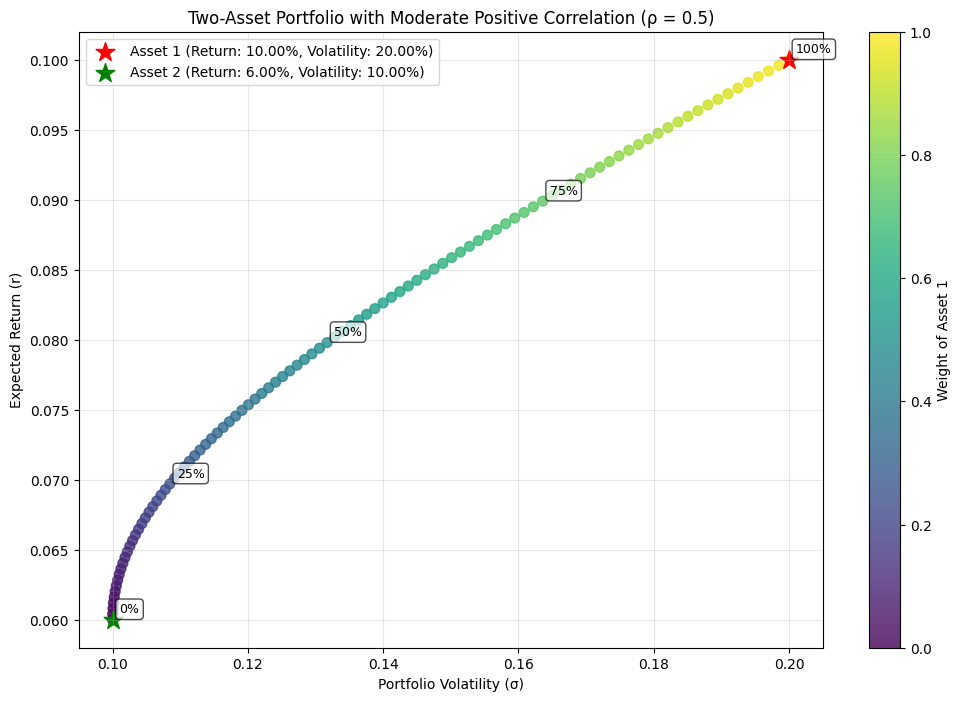

In [17]:
# Example:
r1 = 0.10  # 10% expected return for asset 1
r2 = 0.06  # 6% expected return for asset 2
sigma1 = 0.20  # 20% volatility for asset 1
sigma2 = 0.10  # 10% volatility for asset 2

# Change this value to show students how the efficient frontier changes with different correlation values
corr = 0.5

# Plot efficient frontier with different correlation values ()
plot_efficient_frontier_2_assets(r1, r2, sigma1, sigma2, rho=corr, 
                                title=f'Two-Asset Portfolio with Moderate Positive Correlation (ρ = {corr})')

### We will further examine how correlation affects the shape of our efficient frontier

In [ ]:
# We will give arbitrary values for the 2-asset correlation coefficients to show how the efficient frontier changes with different correlation values
correlations = [-0.8, -0.3, 0, 0.3, 0.8]


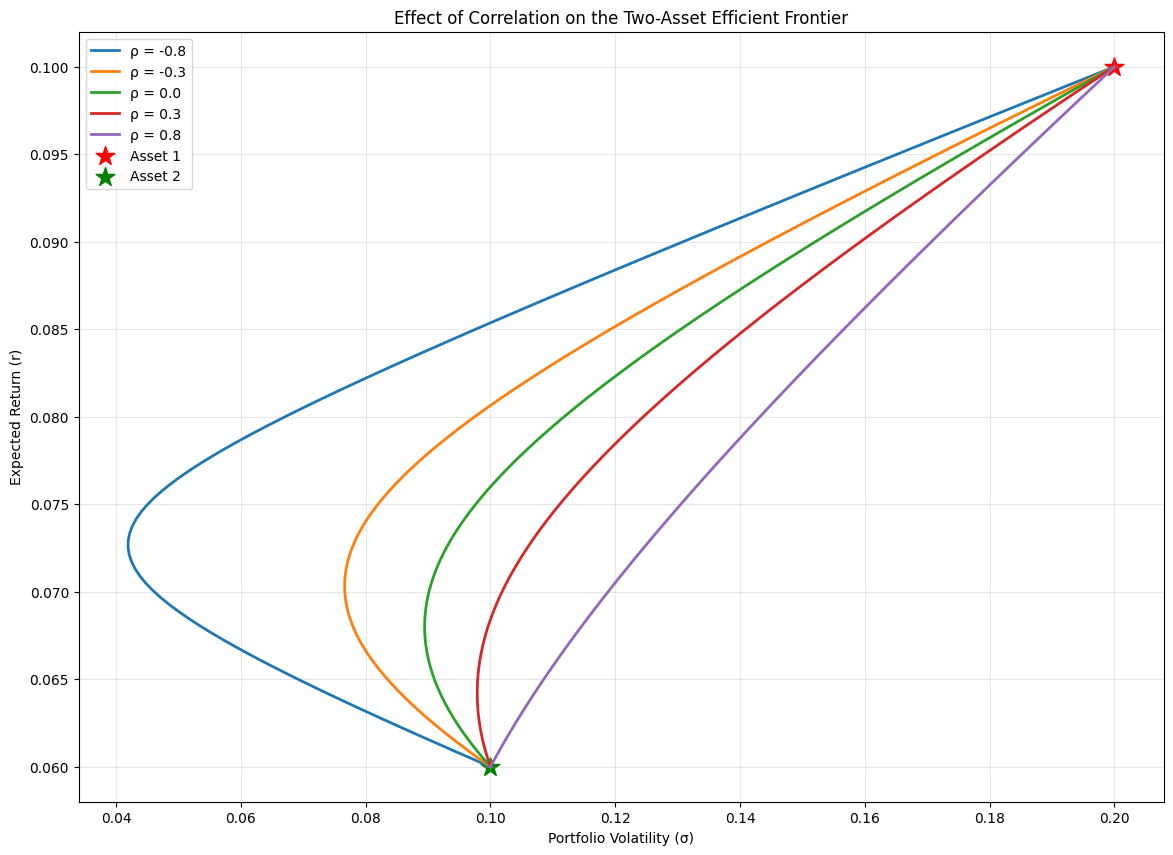

In [19]:
plt.figure(figsize=(14, 10))

for rho in correlations:
    weights = np.linspace(0, 1, 100)
    _, returns, volatilities = two_asset_portfolio(r1, r2, sigma1, sigma2, rho, weights)
    plt.plot(volatilities, returns, label=f'ρ = {rho:.1f}', linewidth=2)

# Plot individual assets
plt.scatter(sigma1, r1, c='red', marker='*', s=200, label=f'Asset 1')
plt.scatter(sigma2, r2, c='green', marker='*', s=200, label=f'Asset 2')

plt.title('Effect of Correlation on the Two-Asset Efficient Frontier')
plt.xlabel('Portfolio Volatility (σ)')
plt.ylabel('Expected Return (r)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Observations on Two-Asset Portfolios

From the above charts, we can observe several key principles of portfolio theory:

1. **Diversification Benefit**: When assets are not perfectly correlated (ρ < 1), combining them in a portfolio can reduce overall risk compared to holding either asset alone.

2. **Correlation Effect**: The lower the correlation between assets, the greater the potential risk reduction. At negative correlations, we can achieve significant risk reduction.

3. **Efficient Frontier Shape**: 
   - At perfect positive correlation (ρ = 1), the efficient frontier becomes a straight line between the two assets.
   - At zero correlation (ρ = 0), the curve bends more toward the y-axis.
   - At negative correlation (ρ < 0), the curve bends even more, potentially allowing portfolios with lower risk than either individual asset.
   - At perfect negative correlation (ρ = -1), it's theoretically possible to construct a risk-free portfolio.

4. **Optimal Weights**: The optimal portfolio weight depends on investor preferences regarding risk and return. There is no single "best" portfolio for all investors.


# Three-Asset Portfolio Analysis

Now we'll extend our analysis to a three-asset portfolio to demonstrate how the efficient frontier expands from a curve to a surface in risk-return space. This better illustrates the core concept of Markowitz's theory - that diversification across multiple assets with imperfect correlations creates a range of portfolio possibilities with different risk-return characteristics.

With three assets, we'll see how the portfolio possibilities extend beyond a simple curve, forming a region in risk-return space. This gives investors more options for achieving their desired balance of risk and return.


In [20]:

def three_asset_portfolio(returns, cov_matrix, weights=None, num_portfolios=5000):
    """
    Calculate risk and return metrics for three-asset portfolios.
    
    Parameters:
    - returns: Array of expected returns for the three assets
    - cov_matrix: Covariance matrix of the three assets
    - weights: Optional pre-defined weights (if None, random weights are generated)
    - num_portfolios: Number of random portfolios to generate (if weights is None)
    
    Returns:
    - weights: Array of weights for each portfolio
    - portfolio_returns: Expected returns for each portfolio
    - portfolio_volatilities: Volatilities for each portfolio
    """
    if weights is None:
        # Generate random weights that sum to 1
        weights = []
        for _ in range(num_portfolios):
            w = np.random.random(3)
            w = w / np.sum(w)  # Normalize to ensure sum is 1
            weights.append(w)
        weights = np.array(weights)
    
    # Calculate portfolio returns
    portfolio_returns = np.dot(weights, returns)
    
    # Calculate portfolio volatilities
    portfolio_volatilities = []
    for i in range(len(weights)):
        portfolio_vol = np.sqrt(np.dot(weights[i].T, np.dot(cov_matrix, weights[i])))
        portfolio_volatilities.append(portfolio_vol)
    
    return weights, portfolio_returns, np.array(portfolio_volatilities)

def create_covariance_matrix(sigmas, corr_matrix):
    """
    Create a covariance matrix from volatilities and correlation matrix.
    
    Parameters:
    - sigmas: Array of volatilities (standard deviations)
    - corr_matrix: Correlation matrix
    
    Returns:
    - Covariance matrix
    """
    n = len(sigmas)
    cov_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            cov_matrix[i, j] = sigmas[i] * sigmas[j] * corr_matrix[i, j]
    
    return cov_matrix

def plot_efficient_frontier_3_assets(returns, sigmas, corr_matrix):
    """
    Plot the efficient frontier for a 3-asset portfolio.
    
    Parameters:
    - returns: Array of expected returns for the three assets
    - sigmas: Array of volatilities (standard deviations) for the three assets
    - corr_matrix: Correlation matrix between the assets
    """
    # Create covariance matrix
    cov_matrix = create_covariance_matrix(sigmas, corr_matrix)
    
    # Generate random portfolios
    weights, portfolio_returns, portfolio_volatilities = three_asset_portfolio(
        returns, cov_matrix, num_portfolios=10000)
    
    # Calculate the Sharpe ratio (assuming risk-free rate = 0)
    sharpe_ratios = portfolio_returns / portfolio_volatilities
    
    # Find portfolio with highest Sharpe ratio
    max_sharpe_idx = np.argmax(sharpe_ratios)
    max_sharpe_return = portfolio_returns[max_sharpe_idx]
    max_sharpe_volatility = portfolio_volatilities[max_sharpe_idx]
    max_sharpe_weights = weights[max_sharpe_idx]
    
    # Find minimum volatility portfolio
    min_vol_idx = np.argmin(portfolio_volatilities)
    min_vol_return = portfolio_returns[min_vol_idx]
    min_vol_volatility = portfolio_volatilities[min_vol_idx]
    min_vol_weights = weights[min_vol_idx]
    
    # Create plot
    plt.figure(figsize=(14, 10))
    
    # Plot random portfolios
    scatter = plt.scatter(portfolio_volatilities, portfolio_returns, 
               c=sharpe_ratios, cmap='viridis', alpha=0.5, s=10)
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Sharpe Ratio')
    
    # Plot individual assets
    plt.scatter([sigmas[0]], [returns[0]], c='red', marker='*', s=200, 
                label=f'Asset 1 (Return: {returns[0]:.2%}, Volatility: {sigmas[0]:.2%})')
    plt.scatter([sigmas[1]], [returns[1]], c='green', marker='*', s=200, 
                label=f'Asset 2 (Return: {returns[1]:.2%}, Volatility: {sigmas[1]:.2%})')
    plt.scatter([sigmas[2]], [returns[2]], c='blue', marker='*', s=200, 
                label=f'Asset 3 (Return: {returns[2]:.2%}, Volatility: {sigmas[2]:.2%})')
    
    # Plot optimal portfolios
    plt.scatter(max_sharpe_volatility, max_sharpe_return, c='gold', marker='D', s=150, 
                label=f'Max Sharpe (Return: {max_sharpe_return:.2%}, Volatility: {max_sharpe_volatility:.2%})')
    plt.scatter(min_vol_volatility, min_vol_return, c='orange', marker='D', s=150, 
                label=f'Min Volatility (Return: {min_vol_return:.2%}, Volatility: {min_vol_volatility:.2%})')
    
    # Add title and labels
    plt.title('Three-Asset Portfolio Efficient Frontier')
    plt.xlabel('Portfolio Volatility (σ)')
    plt.ylabel('Expected Return (r)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Show plot
    plt.show()
    
    # Print optimal portfolio weights
    print("Maximum Sharpe Ratio Portfolio:")
    print(f"Asset 1: {max_sharpe_weights[0]:.2%}")
    print(f"Asset 2: {max_sharpe_weights[1]:.2%}")
    print(f"Asset 3: {max_sharpe_weights[2]:.2%}")
    print()
    print("Minimum Volatility Portfolio:")
    print(f"Asset 1: {min_vol_weights[0]:.2%}")
    print(f"Asset 2: {min_vol_weights[1]:.2%}")
    print(f"Asset 3: {min_vol_weights[2]:.2%}")

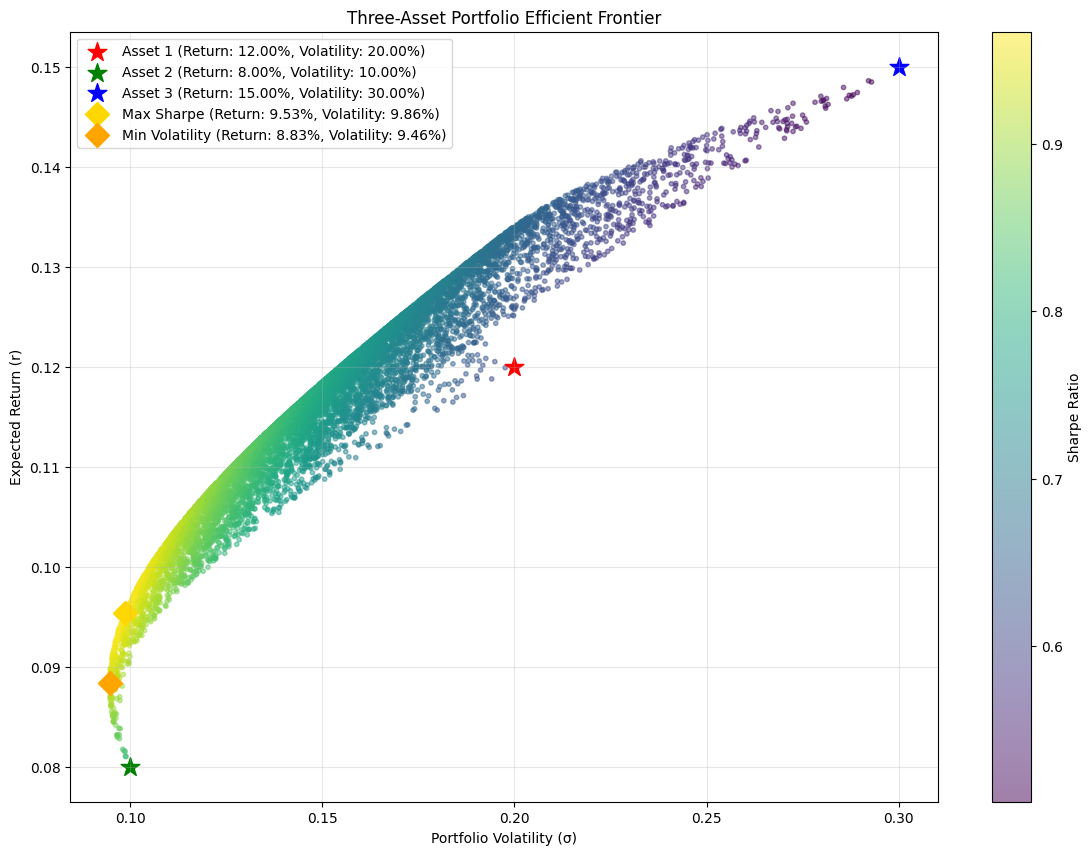

Maximum Sharpe Ratio Portfolio:
Asset 1: 18.25%
Asset 2: 70.29%
Asset 3: 11.46%

Minimum Volatility Portfolio:
Asset 1: 12.33%
Asset 2: 82.82%
Asset 3: 4.85%


In [9]:
# Example parameters for three assets
returns = np.array([0.12, 0.08, 0.15])  # Expected returns
sigmas = np.array([0.20, 0.10, 0.30])  # Volatilities

# Correlation matrix
corr_matrix = np.array([
    [1.0, 0.2, 0.3],  # Correlations with Asset 1
    [0.2, 1.0, 0.1],  # Correlations with Asset 2
    [0.3, 0.1, 1.0]   # Correlations with Asset 3
])

# Plot the efficient frontier
plot_efficient_frontier_3_assets(returns, sigmas, corr_matrix)


# US Industry Portfolio Optimization

In this section, we'll perform portfolio optimization across major US industry sectors. We'll use historical correlations between different industry sectors to identify optimal portfolio allocations.

The data for correlations comes from published research on sector correlations in the US equity market.


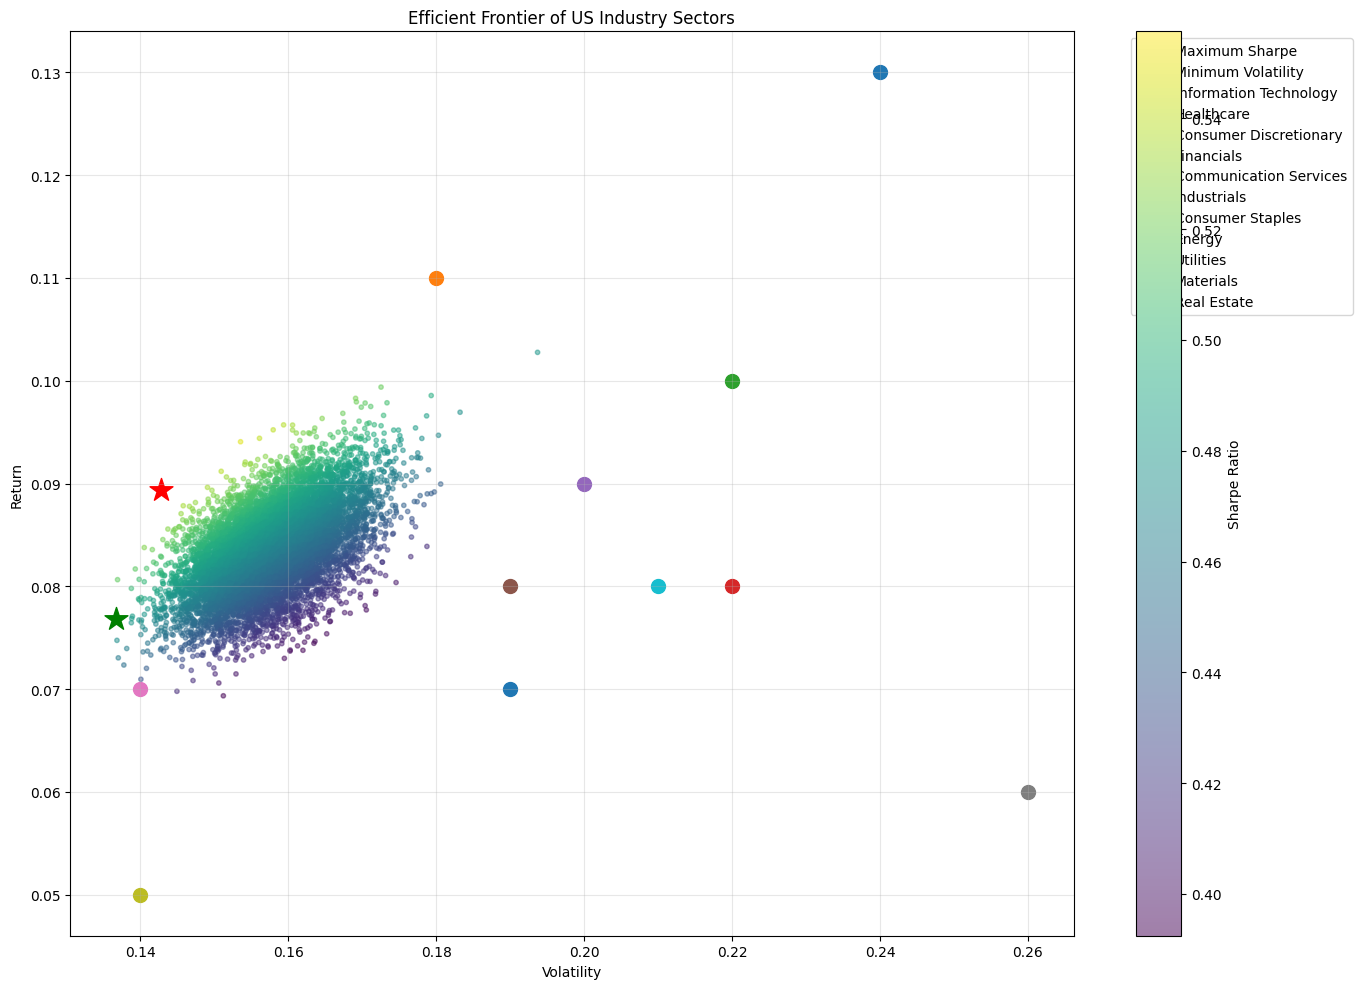

--------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Information Technology: 13.94%
Healthcare: 27.31%
Consumer Discretionary: 4.12%
Financials: 2.30%
Communication Services: 4.66%
Industrials: 7.16%
Consumer Staples: 21.09%
Energy: 0.54%
Utilities: 15.99%
Materials: 1.82%
Real Estate: 1.07%
Expected Return: 8.93%
Expected Volatility: 14.28%
Sharpe Ratio: 0.56


--------------------------------------------------
Minimum Volatility Portfolio Allocation

Information Technology: 0.68%
Healthcare: 16.80%
Consumer Discretionary: 3.06%
Financials: 2.29%
Communication Services: 14.93%
Industrials: 1.48%
Consumer Staples: 16.27%
Energy: 11.64%
Utilities: 20.26%
Materials: 6.62%
Real Estate: 5.97%
Expected Return: 7.69%
Expected Volatility: 13.67%
Sharpe Ratio: 0.49


In [10]:

# Define US industry sectors and their historical metrics
sectors = [
    "Information Technology", 
    "Healthcare", 
    "Consumer Discretionary",
    "Financials", 
    "Communication Services", 
    "Industrials", 
    "Consumer Staples", 
    "Energy", 
    "Utilities", 
    "Materials", 
    "Real Estate"
]

# Expected returns (historical averages, for example purposes)
sector_returns = np.array([0.13, 0.11, 0.10, 0.08, 0.09, 0.08, 0.07, 0.06, 0.05, 0.08, 0.07])

# Volatilities (historical standard deviations)
sector_volatilities = np.array([0.24, 0.18, 0.22, 0.22, 0.20, 0.19, 0.14, 0.26, 0.14, 0.21, 0.19])

# Sample correlation matrix for US industry sectors (example)
# This would typically come from historical market data
sector_corr = np.array([
    [1.00, 0.59, 0.78, 0.62, 0.82, 0.75, 0.47, 0.30, 0.35, 0.61, 0.52],  # IT
    [0.59, 1.00, 0.65, 0.56, 0.57, 0.66, 0.62, 0.25, 0.38, 0.53, 0.49],  # Healthcare
    [0.78, 0.65, 1.00, 0.76, 0.78, 0.85, 0.59, 0.39, 0.34, 0.71, 0.65],  # Cons. Disc.
    [0.62, 0.56, 0.76, 1.00, 0.67, 0.80, 0.56, 0.52, 0.45, 0.67, 0.70],  # Financials
    [0.82, 0.57, 0.78, 0.67, 1.00, 0.75, 0.53, 0.35, 0.38, 0.60, 0.55],  # Comm. Services
    [0.75, 0.66, 0.85, 0.80, 0.75, 1.00, 0.65, 0.51, 0.51, 0.79, 0.70],  # Industrials
    [0.47, 0.62, 0.59, 0.56, 0.53, 0.65, 1.00, 0.36, 0.60, 0.57, 0.53],  # Cons. Staples
    [0.30, 0.25, 0.39, 0.52, 0.35, 0.51, 0.36, 1.00, 0.42, 0.58, 0.42],  # Energy
    [0.35, 0.38, 0.34, 0.45, 0.38, 0.51, 0.60, 0.42, 1.00, 0.47, 0.55],  # Utilities
    [0.61, 0.53, 0.71, 0.67, 0.60, 0.79, 0.57, 0.58, 0.47, 1.00, 0.63],  # Materials
    [0.52, 0.49, 0.65, 0.70, 0.55, 0.70, 0.53, 0.42, 0.55, 0.63, 1.00]   # Real Estate
])

# Create covariance matrix
sector_cov = create_covariance_matrix(sector_volatilities, sector_corr)

# Function to plot efficient frontier for multi-asset portfolio
def plot_multi_asset_frontier(returns, cov_matrix, assets_names, num_portfolios=10000, risk_free_rate=0.01):
    """
    Plot an efficient frontier for a multi-asset portfolio.
    
    Parameters:
    - returns: Array of expected returns for each asset
    - cov_matrix: Covariance matrix of returns
    - assets_names: List of asset names for labeling
    - num_portfolios: Number of random portfolios to generate
    - risk_free_rate: Risk-free rate for Sharpe ratio calculation
    """
    # Generate random portfolios
    all_weights = np.zeros((num_portfolios, len(returns)))
    ret_arr = np.zeros(num_portfolios)
    vol_arr = np.zeros(num_portfolios)
    sharpe_arr = np.zeros(num_portfolios)
    
    for i in range(num_portfolios):
        # Random weights
        weights = np.random.random(len(returns))
        # Normalize to sum to 1
        weights = weights / np.sum(weights)
        all_weights[i, :] = weights
        
        # Expected returns
        ret_arr[i] = np.sum(weights * returns)
        
        # Expected volatility
        vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        
        # Sharpe Ratio
        sharpe_arr[i] = (ret_arr[i] - risk_free_rate) / vol_arr[i]
    
    # Find the optimal portfolios
    max_sharpe_idx = sharpe_arr.argmax()
    max_sharpe_allocation = all_weights[max_sharpe_idx, :]
    max_sharpe_return = ret_arr[max_sharpe_idx]
    max_sharpe_vol = vol_arr[max_sharpe_idx]
    
    min_vol_idx = vol_arr.argmin()
    min_vol_allocation = all_weights[min_vol_idx, :]
    min_vol_return = ret_arr[min_vol_idx]
    min_vol_vol = vol_arr[min_vol_idx]
    
    # Plot
    plt.figure(figsize=(14, 10))
    plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', alpha=0.5, s=10)
    plt.colorbar(label='Sharpe Ratio')
    
    # Plot optimal portfolios
    plt.scatter(max_sharpe_vol, max_sharpe_return, marker='*', color='red', s=300, label='Maximum Sharpe')
    plt.scatter(min_vol_vol, min_vol_return, marker='*', color='green', s=300, label='Minimum Volatility')
    
    # Plot individual assets
    for i, asset in enumerate(assets_names):
        plt.scatter(sector_volatilities[i], returns[i], marker='o', s=100, label=asset)
    
    plt.title('Efficient Frontier of US Industry Sectors')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print allocation details
    print("-"*50)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    for i, asset in enumerate(assets_names):
        print(f"{asset}: {max_sharpe_allocation[i]:.2%}")
    print(f"Expected Return: {max_sharpe_return:.2%}")
    print(f"Expected Volatility: {max_sharpe_vol:.2%}")
    print(f"Sharpe Ratio: {sharpe_arr[max_sharpe_idx]:.2f}")
    
    print("\n")
    print("-"*50)
    print("Minimum Volatility Portfolio Allocation\n")
    for i, asset in enumerate(assets_names):
        print(f"{asset}: {min_vol_allocation[i]:.2%}")
    print(f"Expected Return: {min_vol_return:.2%}")
    print(f"Expected Volatility: {min_vol_vol:.2%}")
    print(f"Sharpe Ratio: {sharpe_arr[min_vol_idx]:.2f}")

# Plot efficient frontier for US sectors
plot_multi_asset_frontier(sector_returns, sector_cov, sectors)


# Conclusion

This notebook has demonstrated the key principles of Modern Portfolio Theory:

1. **Two-Asset Portfolio Analysis**: We showed how combining two assets creates a frontier of possible risk-return combinations, with the shape determined by the correlation between assets.

2. **Three-Asset Portfolio Analysis**: We expanded to three assets, demonstrating how the efficient frontier becomes a surface rather than a curve, offering more diversification possibilities.

3. **Industry Sector Optimization**: We applied portfolio theory to US industry sectors, finding optimal allocations that maximize the Sharpe ratio or minimize volatility.

4. **Gold as a Diversifier**: We analyzed how adding gold to a portfolio can impact risk-return characteristics, especially during market stress when correlations may change.

The key takeaways are:

- Diversification across assets with imperfect correlations can reduce portfolio risk without sacrificing expected return
- The optimal portfolio depends on the investor's risk tolerance and investment objectives
- Asset correlations are critical in determining the effectiveness of diversification
- During market stress, traditional correlations may change, affecting optimal allocations

Modern Portfolio Theory provides a mathematical framework for understanding these relationships and making more informed investment decisions.
